<a href="https://colab.research.google.com/github/ldasari9/IT5443-lab1/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
from google.colab import auth
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
auth.authenticate_user()
print('Authenticated')
#Access the google drive to import CSV file
from google.colab import drive
drive.mount('/content/drive')

Authenticated
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the dataset
file_path = r'/content/drive/MyDrive/real_estate_value.csv'
data = pd.read_csv(file_path)
data.head()

,HouseAge,DistanceToMRT,NoOfStores,Latitude,Longitude,UnitPrice
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


HouseAge         0
DistanceToMRT    0
NoOfStores       0
Latitude         0
Longitude        0
UnitPrice        0
dtype: int64
         HouseAge  DistanceToMRT  NoOfStores    Latitude   Longitude  \
count  414.000000     414.000000  414.000000  414.000000  414.000000   
mean    17.712560    1083.885689    4.094203   24.969030  121.533361   
std     11.392485    1262.109595    2.945562    0.012410    0.015347   
min      0.000000      23.382840    0.000000   24.932070  121.473530   
25%      9.025000     289.324800    1.000000   24.963000  121.528085   
50%     16.100000     492.231300    4.000000   24.971100  121.538630   
75%     28.150000    1454.279000    6.000000   24.977455  121.543305   
max     43.800000    6488.021000   10.000000   25.014590  121.566270   

        UnitPrice  
count  414.000000  
mean    37.980193  
std     13.606488  
min      7.600000  
25%     27.700000  
50%     38.450000  
75%     46.600000  
max    117.500000  


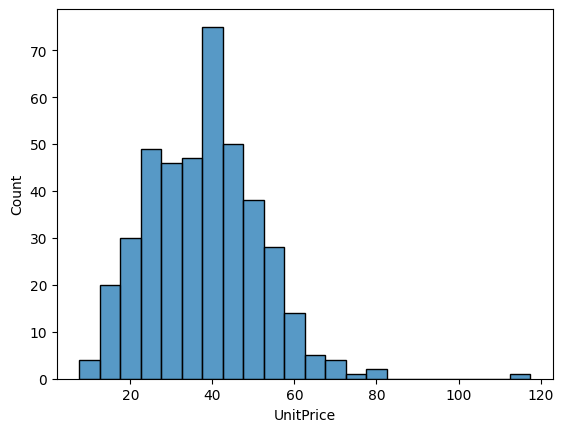

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Here i need to seperate target and features
X = data[['HouseAge', 'DistanceToMRT', 'NoOfStores', 'Latitude', 'Longitude']]
y = data['UnitPrice']

# Checking for missing values
print(data.isnull().sum())

# summary of the data
print(data.describe())

# Checking for distribution of the target variable
sns.histplot(data['UnitPrice'])
plt.show()

# split into training and testing  (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Train and fine-tune a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train_scaled, y_train)

# Predict and evaluate the Decision Tree Regressor
y_pred_dt = dt_regressor.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'Decision Tree Mean Squared Error: {mse_dt}')

# Train and fine-tune a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

# Predict and evaluate the Random Forest Regressor
y_pred_rf = rf_regressor.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')

Decision Tree Mean Squared Error: 58.462168674698795
Random Forest Mean Squared Error: 34.63745818539293


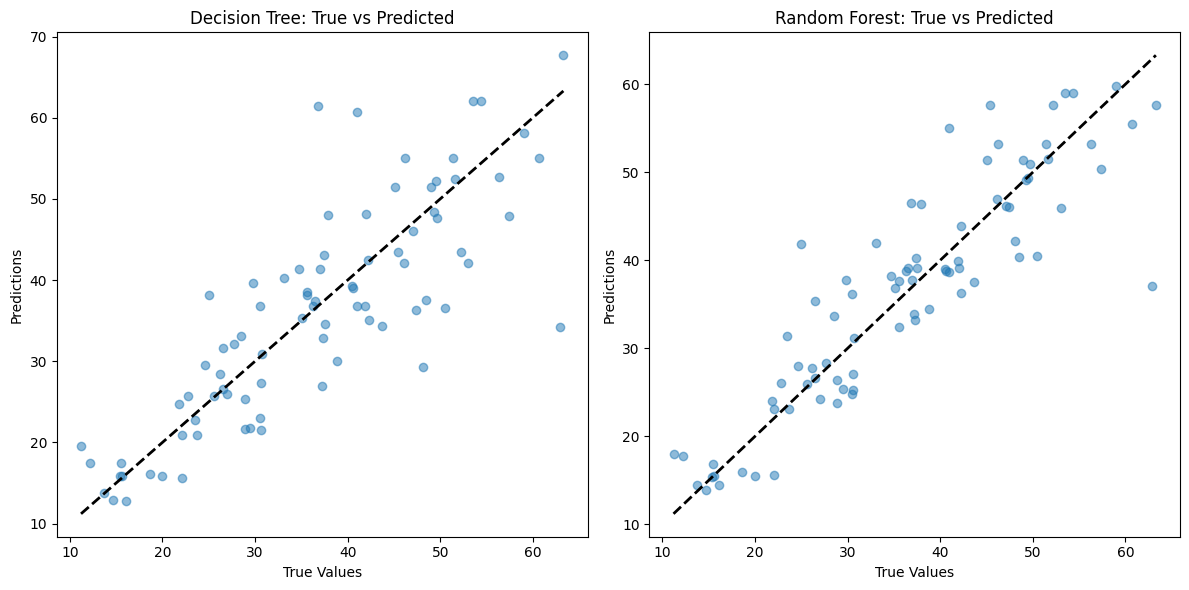

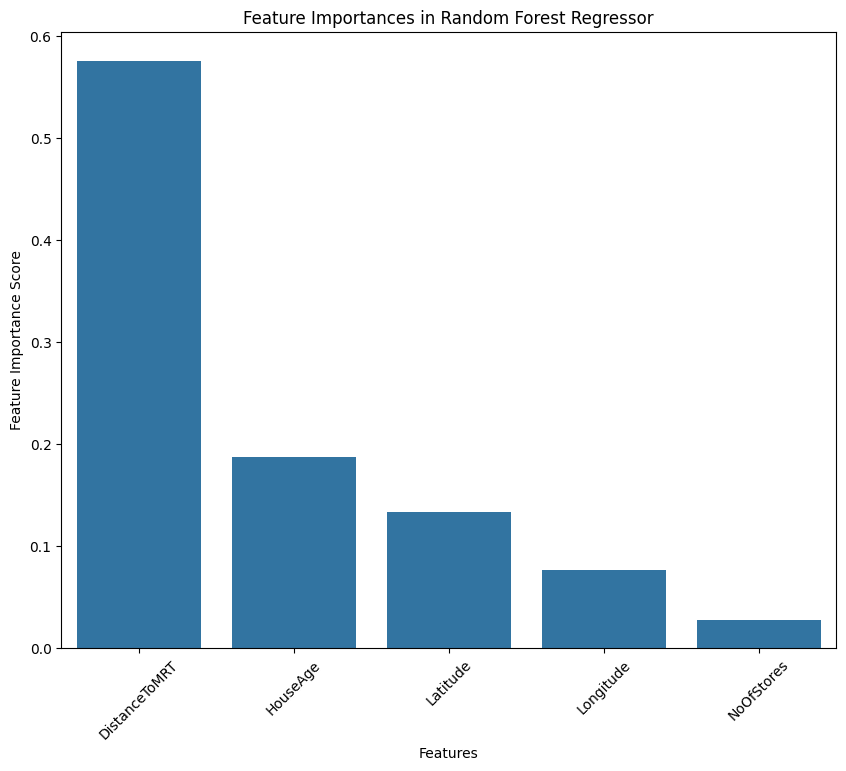

In [ ]:
# Plot True vs Predicted values for Decision Tree
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Decision Tree: True vs Predicted')

# Plot True vs Predicted values for Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest: True vs Predicted')

plt.tight_layout()
plt.show()

# Plot Feature Importances for Random Forest
feature_importances = pd.Series(rf_regressor.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Vertical bar graph for feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances.index, y=feature_importances.values)
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Feature Importances in Random Forest Regressor')
plt.xticks(rotation=45)
plt.show()